# アユムのファイル

In [11]:
!pip install ultralytics


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
from ultralytics import YOLO
import cv2
import os

# Load a model (既に読み込んでいる場合は重複しないよう調整してください)
model = YOLO("yolo11n-pose.pt")

# --- 推論用設定 ---
# 入力例: 画像ファイル, 動画ファイル, フォルダ ("images/"), またはカメラ(0)
source = "000000000086.jpg"    # ここを使いたい入力に変更
imgsz = 640
conf = 0.25
save_dir = "runs/pose_infer"   # 保存先ディレクトリ

os.makedirs(save_dir, exist_ok=True)

# 推論実行
results = model.predict(source=source, imgsz=imgsz, conf=conf)

# results は iterable。複数フレーム/画像に対して処理する。
for i, r in enumerate(results):
    # 可視化画像を取得して保存 (r.plot() はRGB画像を返す)
    try:
        annotated = r.plot()  # numpy array (RGB)
        out_path = os.path.join(save_dir, f"annotated_{i}.jpg")
        # OpenCV はBGRで扱うため変換して保存
        cv2.imwrite(out_path, cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR))
        print(f"Saved annotated image: {out_path}")
    except Exception as e:
        print("Could not plot/save annotated image:", e)

    # キーポイントがあれば取り出して表示 (モデルの出力形式に依存するため安全にアクセス)
    try:
        # ultralytics のバージョンにより属性名が異なることがあるので安全に取得
        if hasattr(r, "keypoints") and r.keypoints is not None:
            kps = r.keypoints
        elif hasattr(r, "masks") and r.masks is not None:
            kps = r.masks
        else:
            kps = None

        if kps is not None:
            # kps を表示しやすい形に変換して出力
            try:
                arr = np.array(kps)  # 多くの場合 numpy に変換可能
            except Exception:
                arr = kps
            print(f"Frame {i} keypoints / mask info:", type(arr), getattr(arr, "shape", None))
            # 必要ならここで arr を解析して各姿勢のキーポイント座標を処理
        else:
            print(f"Frame {i}: no keypoints found in result")
    except Exception as e:
        print("Error while extracting keypoints:", e)
# ...existing code...


image 1/1 c:\Users\agugu\programming\MediaKeiensyu2\000000000086.jpg: 640x512 1 person, 138.7ms
Speed: 2.6ms preprocess, 138.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)
Saved annotated image: runs/pose_infer\annotated_0.jpg
Frame 0 keypoints / mask info: <class 'ultralytics.engine.results.Keypoints'> torch.Size([1, 17, 3])


In [28]:
!pip install pycocotools
from pycocotools.coco import COCO
import requests, os
from tqdm import tqdm

# アノテーションファイルの読み込み
coco = COCO('annotations/person_keypoints_train2017.json')
img_ids = coco.getImgIds()[:1000]  # 先頭1000枚だけ取得

save_dir = 'subset_coco_pose'
os.makedirs(save_dir, exist_ok=True)

for img_id in tqdm(img_ids):
    info = coco.loadImgs(img_id)[0]
    url = info['coco_url']
    r = requests.get(url)
    open(os.path.join(save_dir, info['file_name']), 'wb').write(r.content)



loading annotations into memory...



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


FileNotFoundError: [Errno 2] No such file or directory: 'annotations/person_keypoints_train2017.json'

In [3]:
!pip install deeplake


  Using cached deeplake-3.9.52-py3-none-any.whl
  Using cached pathos-0.3.4-py3-none-any.whl.metadata (11 kB)
  Using cached humbug-0.3.2-py3-none-any.whl.metadata (6.8 kB)
Using cached humbug-0.3.2-py3-none-any.whl (15 kB)
Using cached pathos-0.3.4-py3-none-any.whl (82 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] プロセスはファイルにアクセスできません。別のプロセスが使用中です。: 'C:\\Users\\agugu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\deeplake\\api\\tests\\test_rechunk.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import deeplake

# トレーニングセットのロード
train_ds = deeplake.load("hub://activeloop/lsp-train")

# テストセットのロード
test_ds = deeplake.load("hub://activeloop/lsp-test")

c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\humbug\report.py:47: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore
c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train



\

hub://activeloop/lsp-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-test



hub://activeloop/lsp-test loaded successfully.



\

In [5]:
!pip install matplotlib pillow deeplake



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


-

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train



-

hub://activeloop/lsp-train loaded successfully.



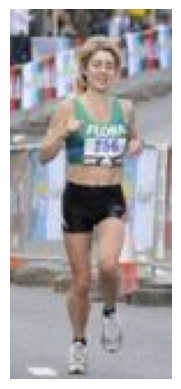

In [10]:
import deeplake
import matplotlib.pyplot as plt

# トレーニングセットをロード
train_ds = deeplake.load("hub://activeloop/lsp-train")

# 最初の画像を取得
img = train_ds.images[0].numpy()  # NumPy配列に変換

# 表示
plt.imshow(img)
plt.axis('off')  # 軸を非表示
plt.show()

In [9]:
import os
from glob import glob
import argparse
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
import cv2

def infer_folder(model_path, images_dir, out_dir, imgsz=640, conf=0.25, device='0'):
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(os.path.join(out_dir, "annotated"), exist_ok=True)
    os.makedirs(os.path.join(out_dir, "keypoints"), exist_ok=True)

    model = YOLO(model_path, device=device)
    paths = sorted(glob(os.path.join(images_dir, "*.*")))
    for p in tqdm(paths, desc="Images"):
        try:
            results = model.predict(source=p, imgsz=imgsz, conf=conf, verbose=False)
        except Exception as e:
            print("Model predict error:", p, e)
            continue

        # results iterable — 画像ごとの処理（動画ならフレームごと）
        for i, r in enumerate(results):
            # 可視化画像保存
            try:
                annotated = r.plot()  # RGB numpy
                out_img = os.path.join(out_dir, "annotated", os.path.splitext(os.path.basename(p))[0] + ".jpg")
                cv2.imwrite(out_img, cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR))
            except Exception as e:
                print("Could not save annotated image:", e)

            # keypoints 保存（存在すれば numpy に）
            kp_arr = None
            try:
                if hasattr(r, "keypoints") and r.keypoints is not None:
                    # r.keypoints はモデルとバージョンで異なる型の可能性があるため安全に変換
                    try:
                        kp_arr = np.array(r.keypoints)
                    except Exception:
                        try:
                            kp_arr = np.array(r.keypoints.cpu())
                        except Exception:
                            kp_arr = r.keypoints
                # 保存
                out_npz = os.path.join(out_dir, "keypoints", os.path.splitext(os.path.basename(p))[0] + ".npz")
                np.savez_compressed(out_npz, keypoints=kp_arr, image_path=p)
            except Exception as e:
                print("Could not save keypoints:", e)

            # 1画像につき1回で良ければ break
            break

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model", default="yolo11n-pose.pt")
    parser.add_argument("--images", required=True, help="画像フォルダのパス")
    parser.add_argument("--out", default="runs/lsp_pose_infer")
    parser.add_argument("--imgsz", type=int, default=640)
    parser.add_argument("--conf", type=float, default=0.25)
    parser.add_argument("--device", default="0", help="'cpu' or GPU id like '0' or 'cuda:0'")
    args = parser.parse_args()
    infer_folder(args.model, args.images, args.out, imgsz=args.imgsz, conf=args.conf, device=args.device)

usage: ipykernel_launcher.py [-h] [--model MODEL] --images IMAGES [--out OUT]
                             [--imgsz IMGSZ] [--conf CONF] [--device DEVICE]
ipykernel_launcher.py: error: the following arguments are required: --images


SystemExit: 2

C:\Users\agugu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
